In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 

In [2]:
family = pd.read_csv('../../data/raw/illumina/Family-level microbiota.csv')
family.head(10)

,Sample ID,Peptoniphilaceae,Campylobacteraceae,Streptococcaceae,Moraxellaceae,Staphylococcaceae,Prevotellaceae,Corynebacteriaceae,Peptostreptococcaceae,Lactobacillaceae,...,Sphaerobacteraceae,Limnochordaceae,Chthonomonadaceae,Egicoccaceae,Jiangellaceae,Orbaceae,Bernardetiaceae,Succinivibrionaceae,Sporolactobacillaceae,Gemmataceae
0,UAB 17001,46.4265,0.6828,0.0650,6.7373,1.8859,1.6713,5.1440,0.3967,0.0650,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
1,UAB 17002,1.6004,0.0081,0.0866,0.3201,1.4494,0.0000,0.5536,0.0000,0.1490,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
2,UAB 17003,41.8100,6.9997,5.5466,0.1772,0.4794,20.7520,1.4129,1.0206,0.1556,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
3,UAB 17004,19.7614,0.2237,0.8203,0.8203,6.4131,0.9694,6.7860,0.0000,0.0000,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
4,UAB 17005,49.7581,1.8944,10.5872,0.7384,8.2395,0.0611,7.7558,0.8453,0.1528,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
5,UAB 17006,61.8284,0.0064,6.0330,0.5749,3.2758,0.0064,8.3325,0.0128,0.0241,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
6,UAB 17007,0.2657,0.0079,23.4195,0.0053,30.6832,0.5117,4.0344,0.0184,1.6942,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
7,UAB 17008,51.0829,9.2802,0.0739,0.0012,1.2485,2.2524,1.1136,0.0829,0.0427,...,0.0012,0.0000,0.0,0.0004,0.0,0.0,0.0000,0.0004,0.0,0.0
8,UAB 17009,43.6255,0.7628,5.4540,0.0011,0.1193,9.9830,0.1464,0.1312,0.0910,...,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
9,UAB 17010,12.4375,0.0407,24.5607,12.8741,0.0477,2.8241,1.6057,1.4640,0.2456,...,0.0000,0.0014,0.0,0.0000,0.0,0.0,0.0014,0.0000,0.0,0.0


## Fertility & Infertility

In [3]:
# split the first column by ' ' if the first value is CON set is as fertile df, otherwise infertile df
family['fertility'] = family['Sample ID'].str.split(' ').str[0]

# set fertility to 1 if CON, 0 if UAB
family['fertility'] = np.where(family['fertility'] == 'CON', 1, 0)

#### PCA

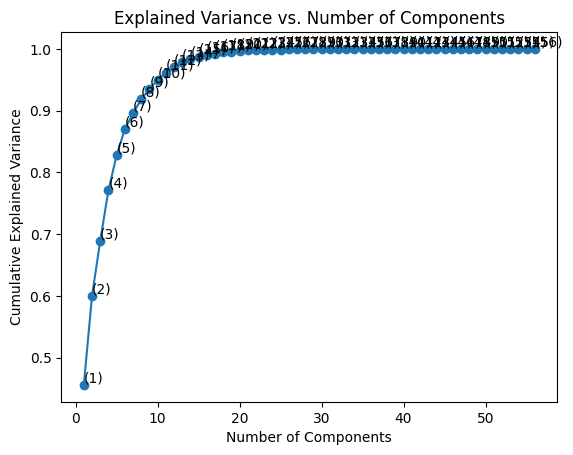

In [4]:
features = family.iloc[:, 1:]

# Apply PCA
pca = PCA()
pca.fit(features)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add text annotations for each point
for i, (num_components, explained_variance) in enumerate(zip(range(1, len(pca.explained_variance_ratio_) + 1), 
                                                               np.cumsum(pca.explained_variance_ratio_))):
    plt.text(num_components, explained_variance, f'({num_components})', ha='left', va='bottom')

plt.show()

In [5]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)  # Choose the number based on the explained variance plot
features_pca = pca.fit_transform(features)

#### KMEANS

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

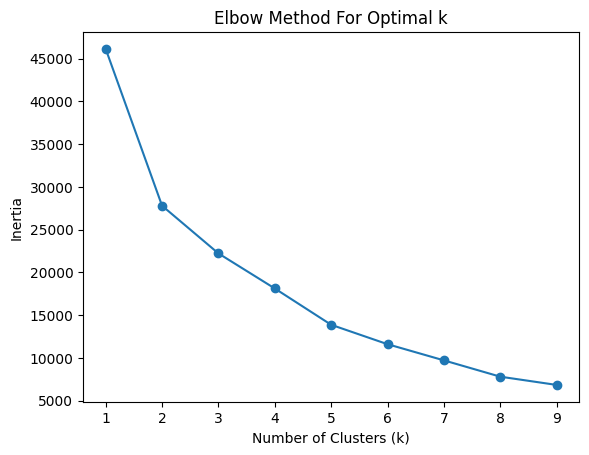

In [6]:
# Initialize a range of k values
k_values = range(1, 10)

# Fit KMeans for each k and calculate the inertia (sum of squared distances to the closest centroid)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


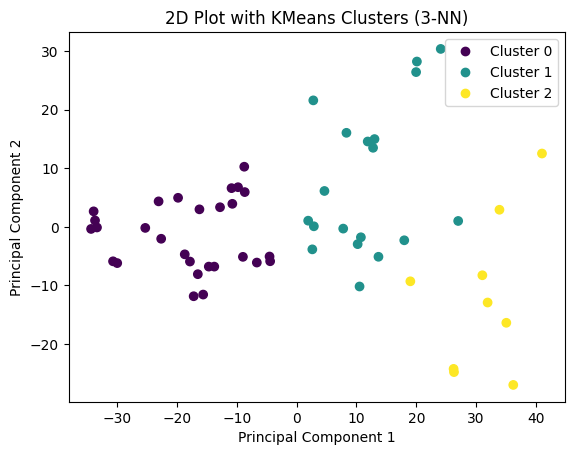

In [7]:
# Fit KMeans clustering on the features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

# Add the cluster labels to the DataFrame
family['cluster'] = cluster_labels

# Plot the 2D data with different colors for each cluster
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', label='Clusters')
plt.title('2D Plot with KMeans Clusters (3-NN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [8]:
# Add a new column for each combination of cluster and fertility
family['cluster_fertility'] = family['cluster'].astype(str) + '_' + family['fertility'].astype(str)
family.head(5)

,Sample ID,Peptoniphilaceae,Campylobacteraceae,Streptococcaceae,Moraxellaceae,Staphylococcaceae,Prevotellaceae,Corynebacteriaceae,Peptostreptococcaceae,Lactobacillaceae,...,Egicoccaceae,Jiangellaceae,Orbaceae,Bernardetiaceae,Succinivibrionaceae,Sporolactobacillaceae,Gemmataceae,fertility,cluster,cluster_fertility
0,UAB 17001,46.4265,0.6828,0.0650,6.7373,1.8859,1.6713,5.1440,0.3967,0.0650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0_0
1,UAB 17002,1.6004,0.0081,0.0866,0.3201,1.4494,0.0000,0.5536,0.0000,0.1490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1_0
2,UAB 17003,41.8100,6.9997,5.5466,0.1772,0.4794,20.7520,1.4129,1.0206,0.1556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0_0
3,UAB 17004,19.7614,0.2237,0.8203,0.8203,6.4131,0.9694,6.7860,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1_0
4,UAB 17005,49.7581,1.8944,10.5872,0.7384,8.2395,0.0611,7.7558,0.8453,0.1528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0_0


#### RANDOMFOREST

In [9]:
X = family.drop(['cluster_fertility', 'cluster', 'fertility', 'Sample ID'], axis=1)
y = family['cluster_fertility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Display additional evaluation metrics
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.50
              precision    recall  f1-score   support

         0_0       0.56      1.00      0.71         5
         0_1       0.00      0.00      0.00         3
         1_0       1.00      0.25      0.40         4
         2_0       0.00      0.00      0.00         0

    accuracy                           0.50        12
   macro avg       0.39      0.31      0.28        12
weighted avg       0.56      0.50      0.43        12

[[5 0 0 0]
 [3 0 0 0]
 [1 0 1 2]
 [0 0 0 0]]


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.

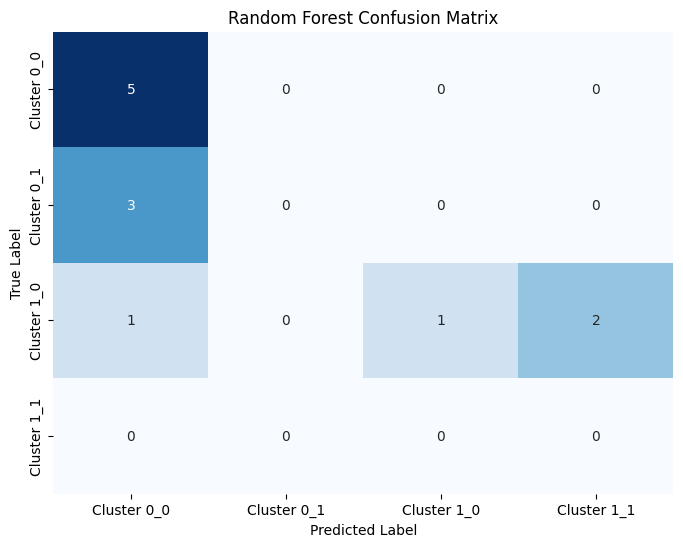

In [12]:
# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'],
            yticklabels=['Cluster 0_0', 'Cluster 0_1', 'Cluster 1_0', 'Cluster 1_1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Save the model
filename = '../../src/models/RandomForest/family_random_forest'

with open(filename, 'wb') as file:
    pickle.dump(rf_classifier, file)